In [1]:
# Analyse de l'Arborisation Publique Linéaire 2017-2018

# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour de meilleures visualisations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Chargement des données
df = pd.read_csv('../data/arbolado-publico-lineal-2017-2018.csv')

C:\Users\Augus\AppData\Local\Temp\ipykernel_86476\1105877051.py:15: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/arbolado-publico-lineal-2017-2018.csv')


In [2]:
print("=== APERÇU GÉNÉRAL ===")
print(f"Dimensions du dataset : {df.shape[0]} lignes × {df.shape[1]} colonnes")

print("\n🔍 Noms des colonnes :")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\n📊 Période des données : 2017-2018")
print(f"🌳 Type d'arborisation : Publique linéaire")

=== APERÇU GÉNÉRAL ===
Dimensions du dataset : 370180 lignes × 18 colonnes

🔍 Noms des colonnes :
 1. long
 2. lat
 3. nro_registro
 4. tipo_activ
 5. comuna
 6. manzana
 7. calle_nombre
 8. calle_altura
 9. calle_chapa
10. direccion_normalizada
11. ubicacion
12. nombre_cientifico
13. ancho_acera
14. estado_plantera
15. ubicacion_plantera
16. nivel_plantera
17. diametro_altura_pecho
18. altura_arbol

📊 Période des données : 2017-2018
🌳 Type d'arborisation : Publique linéaire


In [3]:
print("=== STRUCTURE DES DONNÉES ===")

# Types de données
print("\n📋 Types de données par colonne :")
print(df.dtypes)

# Mémoire utilisée
print(f"\n💾 Mémoire utilisée : {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

=== STRUCTURE DES DONNÉES ===

📋 Types de données par colonne :
long                     float64
lat                      float64
nro_registro              object
tipo_activ                object
comuna                     int64
manzana                   object
calle_nombre              object
calle_altura              object
calle_chapa               object
direccion_normalizada     object
ubicacion                 object
nombre_cientifico         object
ancho_acera               object
estado_plantera           object
ubicacion_plantera        object
nivel_plantera            object
diametro_altura_pecho    float64
altura_arbol             float64
dtype: object

💾 Mémoire utilisée : 285.17 MB


=== VALEURS MANQUANTES ===
Colonnes avec des valeurs manquantes :


,Colonne,Valeurs_manquantes,Pourcentage
5,manzana,146040,39.451078
0,long,15342,4.144470
1,lat,15342,4.144470
9,direccion_normalizada,14239,3.846507
10,ubicacion,8296,2.241072
8,calle_chapa,6459,1.744827
7,calle_altura,5503,1.486574
17,altura_arbol,4322,1.167540
12,ancho_acera,3097,0.836620
14,ubicacion_plantera,1404,0.379275


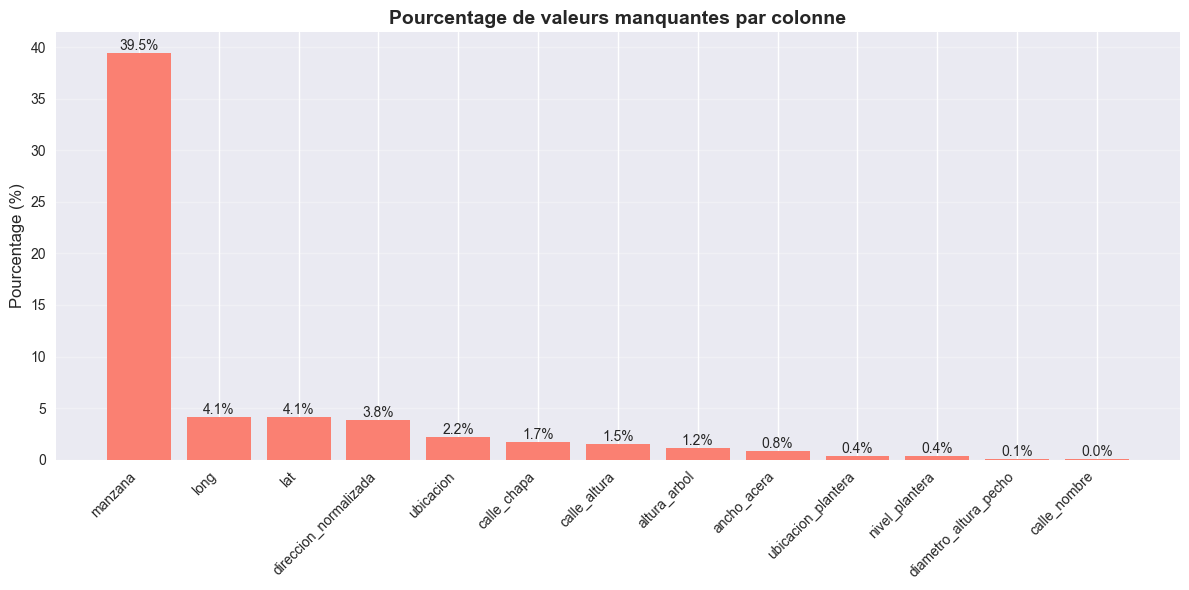

In [4]:
print("=== VALEURS MANQUANTES ===")

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Colonne': missing_data.index,
    'Valeurs_manquantes': missing_data.values,
    'Pourcentage': missing_percent.values
})

missing_df = missing_df[missing_df['Valeurs_manquantes'] > 0].sort_values('Pourcentage', ascending=False)

if len(missing_df) > 0:
    print("Colonnes avec des valeurs manquantes :")
    display(missing_df)
else:
    print("✅ Aucune valeur manquante détectée !")

# Visualisation des valeurs manquantes
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    bars = plt.bar(missing_df['Colonne'], missing_df['Pourcentage'], color='salmon')
    plt.title('Pourcentage de valeurs manquantes par colonne', fontsize=14, fontweight='bold')
    plt.ylabel('Pourcentage (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    
    # Ajout des pourcentages sur les barres
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

In [5]:
print("=== STATISTIQUES DESCRIPTIVES ===")

# Colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"📈 Colonnes numériques ({len(numeric_cols)}) : {list(numeric_cols)}")

if len(numeric_cols) > 0:
    print("\n📊 Statistiques descriptives :")
    display(df[numeric_cols].describe())

=== STATISTIQUES DESCRIPTIVES ===
📈 Colonnes numériques (5) : ['long', 'lat', 'comuna', 'diametro_altura_pecho', 'altura_arbol']

📊 Statistiques descriptives :


,long,lat,comuna,diametro_altura_pecho,altura_arbol
count,354838.000000,354838.000000,370180.000000,369894.000000,365858.000000
mean,-58.458791,-34.612473,9.143735,31.986864,9.036132
std,0.041514,0.033695,3.876242,21.267623,4.894625
min,-58.530458,-34.697333,1.000000,0.000000,1.000000
25%,-58.491269,-34.637834,6.000000,17.000000,6.000000
50%,-58.465865,-34.615023,10.000000,29.000000,8.000000
75%,-58.428583,-34.586580,12.000000,43.000000,12.000000
max,-58.354003,-34.535972,15.000000,199.000000,40.000000


=== ANALYSE DES ESPÈCES D'ARBRES ===
🌿 Nombre total d'espèces différentes : 431
🌳 Espèce la plus commune : Fraxinus pennsylvanica (133609 individus)


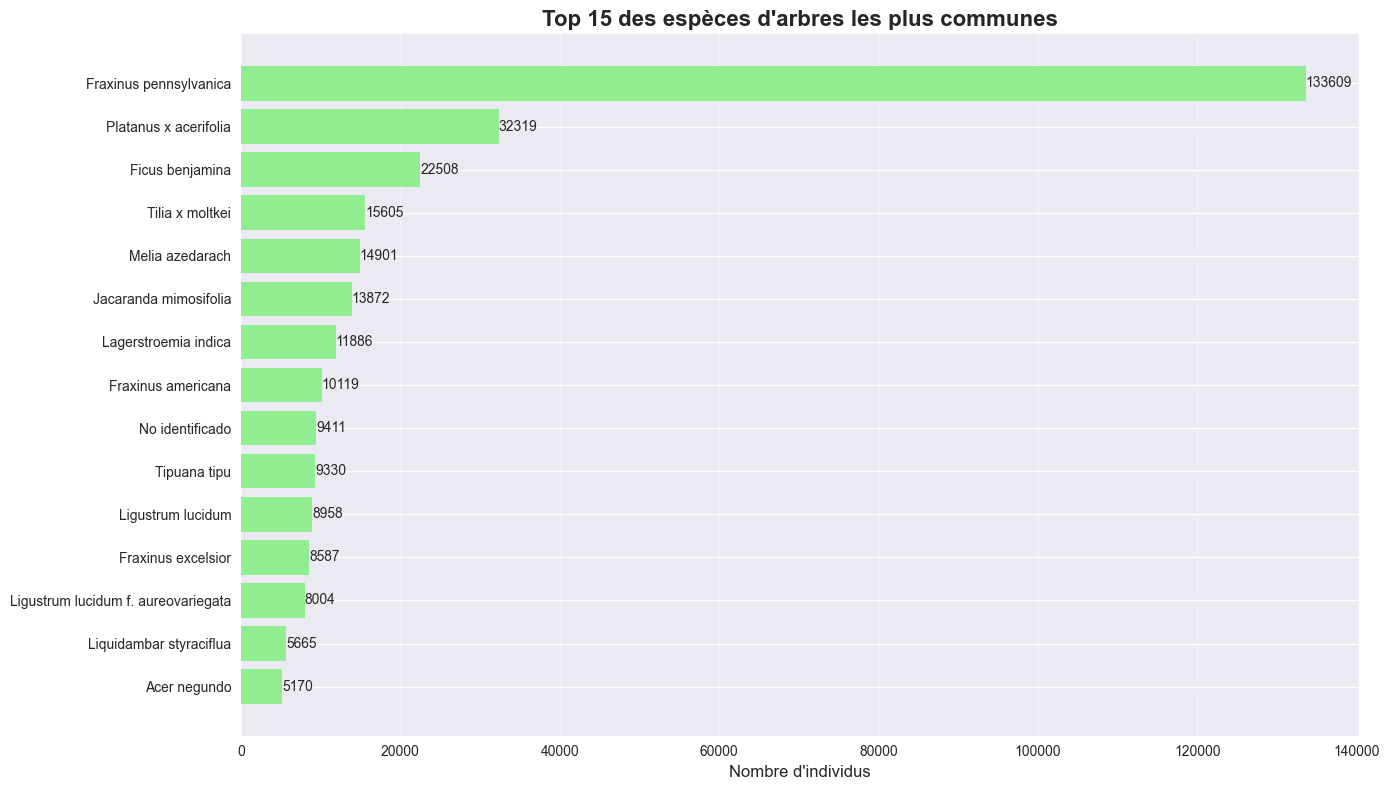


📊 Répartition :
• Top 5 espèces : 59.1% du total
• Top 10 espèces : 73.9% du total


In [6]:
print("=== ANALYSE DES ESPÈCES D'ARBRES ===")

if 'nombre_cientifico' in df.columns:
    species_analysis = df['nombre_cientifico'].value_counts()
    
    print(f"🌿 Nombre total d'espèces différentes : {len(species_analysis)}")
    print(f"🌳 Espèce la plus commune : {species_analysis.index[0]} ({species_analysis.iloc[0]} individus)")
    
    # Top 15 des espèces
    top_15_species = species_analysis.head(15)
    
    plt.figure(figsize=(14, 8))
    bars = plt.barh(top_15_species.index, top_15_species.values, color='lightgreen')
    plt.title('Top 15 des espèces d\'arbres les plus communes', fontsize=16, fontweight='bold')
    plt.xlabel('Nombre d\'individus', fontsize=12)
    plt.gca().invert_yaxis()
    
    # Ajout des nombres sur les barres
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2., 
                f'{int(width)}', ha='left', va='center', fontsize=10)
    
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Répartition des espèces
    print(f"\n📊 Répartition :")
    print(f"• Top 5 espèces : {top_15_species.head(5).sum()/len(df)*100:.1f}% du total")
    print(f"• Top 10 espèces : {top_15_species.head(10).sum()/len(df)*100:.1f}% du total")

=== ANALYSE PAR COMMUNE ===
🗺️ Répartition par commune :
Commune 1: 12723 arbres (3.4%)
Commune 2: 7115 arbres (1.9%)
Commune 3: 13320 arbres (3.6%)
Commune 4: 32346 arbres (8.7%)
Commune 5: 15224 arbres (4.1%)
Commune 6: 15591 arbres (4.2%)
Commune 7: 25608 arbres (6.9%)
Commune 8: 21978 arbres (5.9%)
Commune 9: 36405 arbres (9.8%)
Commune 10: 33421 arbres (9.0%)
Commune 11: 37340 arbres (10.1%)
Commune 12: 38818 arbres (10.5%)
Commune 13: 28287 arbres (7.6%)
Commune 14: 22417 arbres (6.1%)
Commune 15: 29587 arbres (8.0%)


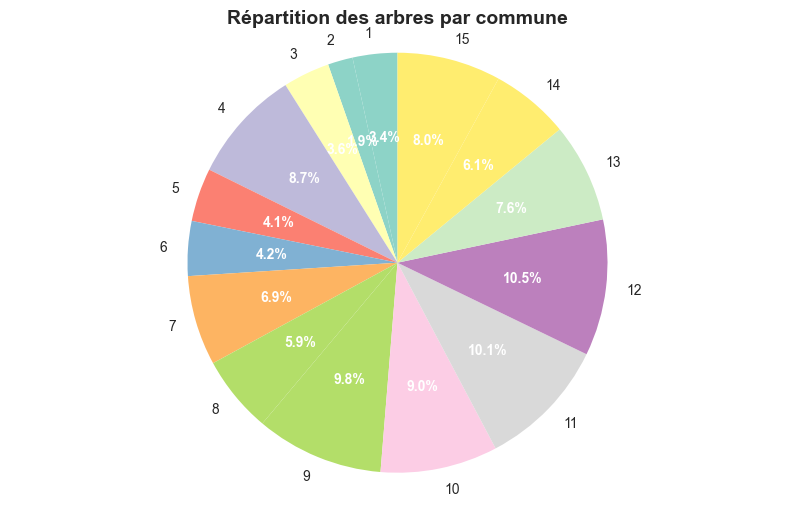

In [7]:
print("=== ANALYSE PAR COMMUNE ===")

if 'comuna' in df.columns:
    commune_dist = df['comuna'].value_counts().sort_index()
    
    print("🗺️ Répartition par commune :")
    for comuna, count in commune_dist.items():
        print(f"Commune {comuna}: {count} arbres ({count/len(df)*100:.1f}%)")
    
    # Visualisation
    plt.figure(figsize=(10, 6))
    colors = plt.cm.Set3(np.linspace(0, 1, len(commune_dist)))
    wedges, texts, autotexts = plt.pie(commune_dist.values, labels=commune_dist.index, 
                                      autopct='%1.1f%%', colors=colors, startangle=90)
    
    plt.title('Répartition des arbres par commune', fontsize=14, fontweight='bold')
    
    # Amélioration de l'apparence des pourcentages
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    plt.axis('equal')
    plt.show()

=== CARACTÉRISTIQUES PHYSIQUES DES ARBRES ===


TypeError: unsupported operand type(s) for -: 'str' and 'str'

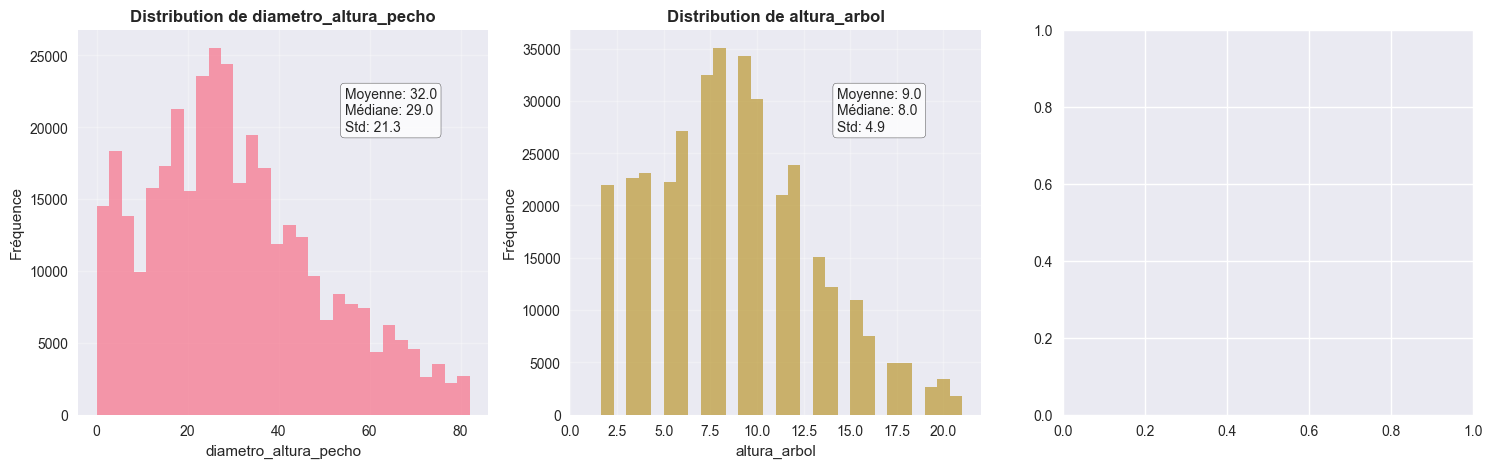

In [8]:
print("=== CARACTÉRISTIQUES PHYSIQUES DES ARBRES ===")

# Création d'un sous-ensemble pour l'analyse
physical_cols = ['diametro_altura_pecho', 'altura_arbol', 'ancho_acera']
available_cols = [col for col in physical_cols if col in df.columns]

if available_cols:
    fig, axes = plt.subplots(1, len(available_cols), figsize=(18, 5))
    
    for i, col in enumerate(available_cols):
        if len(available_cols) > 1:
            ax = axes[i]
        else:
            ax = axes
        
        # Suppression des valeurs extrêmes pour une meilleure visualisation
        data = df[col].dropna()
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        filtered_data = data[(data >= Q1 - 1.5*IQR) & (data <= Q3 + 1.5*IQR)]
        
        ax.hist(filtered_data, bins=30, alpha=0.7, color=f'C{i}')
        ax.set_title(f'Distribution de {col}', fontweight='bold')
        ax.set_xlabel(col)
        ax.set_ylabel('Fréquence')
        ax.grid(alpha=0.3)
        
        # Statistiques
        stats_text = f'Moyenne: {data.mean():.1f}\nMédiane: {data.median():.1f}\nStd: {data.std():.1f}'
        ax.text(0.65, 0.85, stats_text, transform=ax.transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                fontsize=10, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

In [ ]:
print("=== ÉTAT ET NIVEAU DES PLANTATIONS ===")

categorical_cols = ['estado_plantera', 'nivel_plantera', 'ubicacion_plantera']
available_cats = [col for col in categorical_cols if col in df.columns]

if available_cats:
    fig, axes = plt.subplots(1, len(available_cats), figsize=(18, 6))
    
    for i, col in enumerate(available_cats):
        if len(available_cats) > 1:
            ax = axes[i]
        else:
            ax = axes
        
        value_counts = df[col].value_counts()
        
        if len(value_counts) <= 8:  # Diagramme circulaire pour peu de catégories
            wedges, texts, autotexts = ax.pie(value_counts.values, labels=value_counts.index, 
                                            autopct='%1.1f%%', startangle=90)
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
        else:  # Diagramme en barres pour beaucoup de catégories
            bars = ax.bar(range(len(value_counts)), value_counts.values, color='lightblue')
            ax.set_xticks(range(len(value_counts)))
            ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
            ax.set_ylabel('Nombre')
            
            # Ajout des nombres sur les barres
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}', ha='center', va='bottom', fontsize=9)
        
        ax.set_title(f'Distribution de {col}', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

In [ ]:
print("=== ANALYSE DES RUES ===")

if 'calle_nombre' in df.columns:
    street_analysis = df['calle_nombre'].value_counts().head(15)
    
    print("🏙️ Rues avec le plus d'arbres :")
    for i, (street, count) in enumerate(street_analysis.items(), 1):
        print(f"{i:2d}. {street}: {count} arbres")
    
    # Visualisation
    plt.figure(figsize=(12, 8))
    bars = plt.barh(range(len(street_analysis)), street_analysis.values, color='lightcoral')
    plt.yticks(range(len(street_analysis)), street_analysis.index)
    plt.title('Top 15 des rues avec le plus d\'arbres', fontsize=14, fontweight='bold')
    plt.xlabel('Nombre d\'arbres')
    plt.gca().invert_yaxis()
    
    # Ajout des nombres
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2., 
                f'{int(width)}', ha='left', va='center', fontsize=10)
    
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

In [ ]:
print("=== MATRICE DE CORRÉLATION ===")

numeric_columns = df.select_dtypes(include=[np.number]).columns

if len(numeric_columns) > 1:
    correlation_matrix = df[numeric_columns].corr()
    
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
                square=True, fmt='.2f', cbar_kws={'shrink': .8})
    plt.title('Matrice de Corrélation des Variables Numériques', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Corrélations fortes
    strong_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr = correlation_matrix.iloc[i, j]
            if abs(corr) > 0.5 and not pd.isna(corr):
                strong_correlations.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    corr
                ))
    
    if strong_correlations:
        print("\n🔗 Corrélations fortes (|r| > 0.5) :")
        for var1, var2, corr in strong_correlations:
            print(f"• {var1} ↔ {var2}: {corr:.3f}")

In [ ]:
print("=== RÉSUMÉ DES INSIGHTS ===")

print("📋 Points clés de l'analyse :")

if 'nombre_cientifico' in df.columns:
    total_species = df['nombre_cientifico'].nunique()
    most_common = df['nombre_cientifico'].value_counts().index[0]
    print(f"• 🌿 {total_species} espèces d'arbres différentes identifiées")
    print(f"• 🌳 Espèce dominante : {most_common}")

if 'comuna' in df.columns:
    commune_counts = df['comuna'].value_counts()
    print(f"• 🗺️ Commune avec le plus d'arbres : Commune {commune_counts.index[0]}")

if 'diametro_altura_pecho' in df.columns:
    avg_diameter = df['diametro_altura_pecho'].mean()
    print(f"• 📏 Diamètre moyen des arbres : {avg_diameter:.1f} cm")

if 'altura_arbol' in df.columns:
    avg_height = df['altura_arbol'].mean()
    print(f"• 📐 Hauteur moyenne des arbres : {avg_height:.1f} m")

print(f"\n✅ Analyse terminée avec succès !")
print(f"📊 Dataset analysé : {df.shape[0]:,} arbres × {df.shape[1]} caractéristiques")